In [313]:
#import libraries needed for the project

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [314]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


### Examining the Data

In [315]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41155 entries, 0 to 41154
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    41155 non-null  float64 
 1   cut      41155 non-null  category
 2   color    41155 non-null  category
 3   clarity  41155 non-null  category
 4   depth    41155 non-null  float64 
 5   table    41154 non-null  float64 
 6   price    41154 non-null  float64 
 7   x        41154 non-null  float64 
 8   y        41154 non-null  float64 
 9   z        41154 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 2.3 MB


In [316]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        170
table        109
price      10095
x            554
y            550
z            373
dtype: int64

From the examined data, I noticed that table, price, x, y and z columns contain 1 null value.

Cut, color and clarity are categorical columns, definitely not dichotomous variables because they contain more that 2 categories.

Color is likely to be norminal. Usually it's just for preference....usually!

In [317]:
#Checking duplicates

diamonds[diamonds.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
40096,0.33,Ideal,G,VVS1,62.0,56.0,1114.0,4.48,4.45,2.77
40462,0.32,Ideal,D,VVS1,61.8,56.0,1140.0,4.41,4.39,2.72
40464,0.32,Ideal,D,VVS1,61.8,56.0,1140.0,4.41,4.39,2.72
41123,0.60,Premium,D,SI2,62.0,57.0,1196.0,5.43,5.35,3.34


In [318]:
#checking the types of categories in the categorical columns.
catCols = ['cut', 'color', 'clarity']

for i in catCols:
    print(i)
    print(diamonds[i].value_counts())
    print(" ")


cut
Ideal        16030
Premium      11160
Very Good     9094
Good          3697
Fair          1174
Name: cut, dtype: int64
 
color
G    8665
E    7122
F    7110
H    6707
D    4932
I    4323
J    2296
Name: color, dtype: int64
 
clarity
SI1     9746
VS2     9196
SI2     7551
VS1     6247
VVS2    3739
VVS1    2740
IF      1370
I1       566
Name: clarity, dtype: int64
 


### Cleaning the data

In [319]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [320]:
#Removing duplicates
diamonds.drop_duplicates(keep='first', inplace=True)

#Removing null records
diamonds.dropna(inplace=True)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41025 entries, 0 to 41153
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    41025 non-null  float64 
 1   cut      41025 non-null  category
 2   color    41025 non-null  category
 3   clarity  41025 non-null  category
 4   depth    41025 non-null  float64 
 5   table    41025 non-null  float64 
 6   price    41025 non-null  float64 
 7   x        41025 non-null  float64 
 8   y        41025 non-null  float64 
 9   z        41025 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 2.6 MB


In [321]:
#Renaming the x, y and z columns to meaningful names
rename_columns = {
    'x':'length_mm',
    'y':'width_mm',
    'z':'depth_mm',
    'depth':'depth_pct'
}

diamonds.rename(columns=rename_columns, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth_pct,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Simple Linear Regression Model

In [322]:
diamonds_correlation = diamonds.corr()[['price']].sort_values(by='price', ascending=False)
diamonds_correlation

,price
price,1.000000
carat,0.919202
length_mm,0.888310
depth_mm,0.878445
width_mm,0.871827
table,0.138611
depth_pct,-0.019000


<AxesSubplot:>

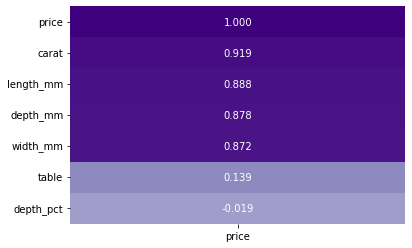

In [323]:
sns.heatmap(data=diamonds_correlation, cmap='Purples', cbar=False, annot=True, fmt='.3f', vmax=1, vmin=-1)

price has a <b>'Very Strong Positive'</b> correlation with <b>carat</b>

price has a <b>'Strong Positive'</b> correlation with <b>length_mm, depth_mm, width_mm</b>

In [324]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(diamonds[['carat']], diamonds[['price']], test_size=0.3, random_state=20)

In [325]:
#Create the model
model = LinearRegression()

#Fitting the training datasets
model.fit(x_train, y_train)

#Scoring the test dataset
model.score(x_test, y_test)

0.8449121232871877

In [326]:
#Scoring the train dataset
model.score(x_train, y_train)

0.8449365808381111

In [327]:
#Predicting
y_predicted = model.predict(x_test)
y_predicted

array([[ 7317.15093305],
       [ 1063.9694589 ],
       [ 9478.74452905],
       ...,
       [13338.73309334],
       [ 1835.96717176],
       [ 1295.56877276]])

In [328]:
#creating DataFrame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])
predicted = predicted.round(2)
predicted.head()

,price_predicted
0,7317.15
1,1063.97
2,9478.74
3,214.77
4,14959.93


In [329]:
#combining the predicted data and actual data
combined = predicted.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,price_predicted,carat,price
0,7317.15,1.22,5739.0
1,1063.97,0.41,827.0
2,9478.74,1.50,10374.0
3,214.77,0.30,789.0
4,14959.93,2.21,18276.0


In [330]:
#melting the price and predicted price into 1 column
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price', 'price_predicted'], var_name='price_type', value_name='price_value')
melted.head()

,carat,price_type,price_value
0,1.22,price,5739.0
1,0.41,price,827.0
2,1.50,price,10374.0
3,0.30,price,789.0
4,2.21,price,18276.0


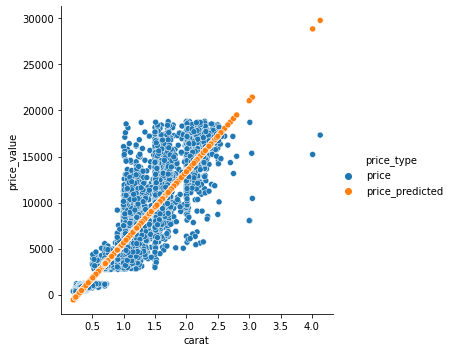

In [331]:
#plotting the data
sns.relplot(data=melted, x='carat', y='price_value', hue='price_type')